# Problem Statement: The basic understanding required from analysing this data is to facilitate and identify factors which are key indicators of loan default. This will assist banks in making better decisions about borrower approval during the credit analysis process.

## We are provided we three sets.

### a) application_data.csv: contains all the information from the current list of loans issued by the bank and the information surrounding the borrowers identified by a target variable of 1 if there was a recent default and 0 if there wasnt.  
### b) previous_application.csv: contains similar information from a past repository of information which can assist in identifying repeat factors and affirming assumptions  
### c) columns_description.csv: offers a basic explanation of what each column indicates    

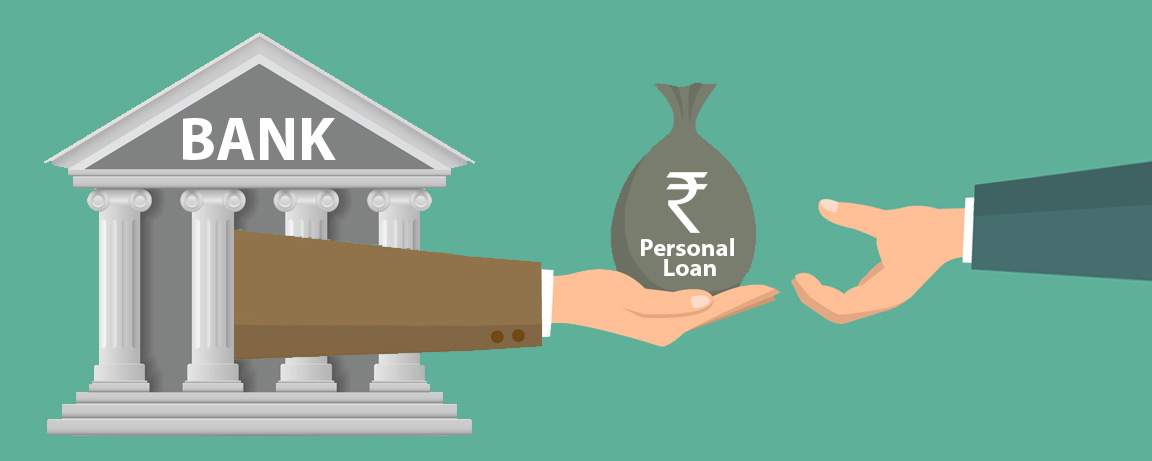

## 1) LOADING THE DATA
#### Data provided includes:
 1) Application Data  
 2) Previous Application Data  
 3) A legend of the column names description

### Import the necessary libraries for Exploratory Data Analysis & prepare for any warnings

In [ ]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

### Read the databases and assign them to variables utilized going forward:

In [ ]:
df_ad=pd.read_csv('../input/bank-customer-credit-history-database/application_data.csv')

### Begin with analysis of the Application_Data.csv database: df_ad
Get a basic understanding of the datatypes and size of the database

In [ ]:
df_ad.info(verbose=True)

Lets get a look and feel of the data to know what we are dealing with:

In [ ]:
df_ad.head()

One can acquire a basic summary of the numerical columns in the database:

In [ ]:
df_ad.describe()

Lets also see the numbers of rows and columns in the data:

In [ ]:
df_ad.shape

## 2) Data Quality Check and Missing Values:
### - Tasks include:

 1) Find percentage of missing values for all columns  
 2) Dropping columns with missing values greater than 50%  
 3) For columns with missing values ~13% choose any 5 and report the best values to impute missing values

### 2.1 Percentage of Missing Values:

In [ ]:
# Check the percentage of missing data in each column, rounded to the nearest integer.
df_ad_missing=round((df_ad.isnull().sum()/len(df_ad))*100,2)
df_ad_missing

### 2.2 Drop Columns with missing values greater than 50%

In [ ]:
# view which columns are missing more than 50% of the data
df_ad_missing=df_ad_missing[df_ad_missing>50]
df_ad_missing

In [ ]:
# check how many columns from the original 122 we shall be dropping.

len(df_ad_missing)

In [ ]:
# assign the names of the columns to be dropped to a list/series for use later

df_ad_droplist=df_ad_missing.index
df_ad_droplist

#### We have concluded that we shall be dropping 41 columns from the original data frame

In [ ]:
# We can drop them using the drop function

df_ad.drop(df_ad_droplist, axis=1, inplace=True)

In [ ]:
# Check the dataframe after dropping the values

df_ad.head()

In [ ]:
# Check the size of the dataframe after dropping

df_ad.shape

In [ ]:
df_ad.columns

In [ ]:
df_ad.head()

#### We have now eliminated and dropped the columns that we would not be using further for analysis

### 2.3 Deal with missing values:
For columns with missing values ~13% and report the best values to impute missing values

In [ ]:
df_ad.isnull().sum()/len(df_ad)*100

The following columns have ~ 13% missing values:  
AMT_REQ_CREDIT_BUREAU_HOUR  
AMT_REQ_CREDIT_BUREAU_DAY  
AMT_REQ_CREDIT_BUREAU_WEEK  
AMT_REQ_CREDIT_BUREAU_MON  
AMT_REQ_CREDIT_BUREAU_QRT  
AMT_REQ_CREDIT_BUREAU_YEAR

It would also make sense to first check the distribution of the data

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_MON'].describe()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

In [ ]:
fig,ax = plt.subplots(6, figsize=[15,20])

ax[0].hist(df_ad['AMT_REQ_CREDIT_BUREAU_HOUR'])
ax[0].title.set_text('AMT_REQ_CREDIT_BUREAU_HOUR')

ax[1].hist(df_ad['AMT_REQ_CREDIT_BUREAU_DAY'])
ax[1].title.set_text('AMT_REQ_CREDIT_BUREAU_DAY')

ax[2].hist(df_ad['AMT_REQ_CREDIT_BUREAU_WEEK'])
ax[2].title.set_text('AMT_REQ_CREDIT_BUREAU_WEEK')

ax[3].hist(df_ad['AMT_REQ_CREDIT_BUREAU_MON'])
ax[3].title.set_text('AMT_REQ_CREDIT_BUREAU_MON')

ax[4].hist(df_ad['AMT_REQ_CREDIT_BUREAU_QRT'])
ax[4].title.set_text('AMT_REQ_CREDIT_BUREAU_QRT')

ax[5].hist(df_ad['AMT_REQ_CREDIT_BUREAU_YEAR'])
ax[5].title.set_text('AMT_REQ_CREDIT_BUREAU_YEAR')

fig.tight_layout(pad=3.0)
plt.show()

From exploring the above data and graphs we can conclude that the values are integers and not floats. This eliminates imputation by mean. The remaining options are median and mode

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_DAY'].mode()


In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_MON'].mode()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

In [ ]:
df_ad['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

### Suggestion on Imputation for Values with ~13% Missing values after analysis:

### The mode for all 6 variables in question is 0. The median for 5 of these variables is also 0. Therefore while it will practically not make a difference, we shall impute with mode for all 6 variables as these are a representation of how many inquiries were made to the credit bureau about a particular client in a given span of time. If we do not know, it is only safe to assume that what holds true for majority of the population, i.e. is the most frequently occuring value, is what should be used as the imputing value.


## 3. Datatype Check:
1. Change the negative age column by absolute function
2. Change the negative dates columns by absolute function
3. Convert 5 categorical columns into object type
4. Convert 5 continout columns into float/int object type

### 3.1 Change the negative age column by absolute function

In [ ]:
df_ad['DAYS_BIRTH'] = abs(df_ad['DAYS_BIRTH'])
df_ad['DAYS_BIRTH'].describe()

The DAYS_BIRTH column has no more negative values.

### 3.2 Change the negative DAYS columns by absolute function

We shall follow suit with all DAYS_ category of variables

In [ ]:
df_ad['DAYS_EMPLOYED'] = abs(df_ad['DAYS_EMPLOYED'])
df_ad['DAYS_REGISTRATION'] = abs(df_ad['DAYS_REGISTRATION'])
df_ad['DAYS_ID_PUBLISH'] = abs(df_ad['DAYS_ID_PUBLISH'])
df_ad[['DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

#### Check the types of all columns by seeing how many unique values exist in each. We can be certain that for X no. of unique values a variable is categorical where as if it has hundreds or thousands of unique values, it is continous(unless it is an index or an indentifier)

In [ ]:
df_ad.nunique()

### 3.3 Convert 5 categorical columns into object type

#### Categorical variable  
Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order.
Both Yes/No Questions(represented by 1 and 0 in this case) and Ratings are considered categorical in nature

The 5 variables chosen along with the number of unqiue values in each of them are:

REGION_RATING_CLIENT : 3  
REGION_RATING_CLIENT_W_CITY : 3  
REG_REGION_NOT_LIVE_REGION : 2  
REG_REGION_NOT_WORK_REGION : 2  
LIVE_REGION_NOT_WORK_REGION  : 2  

All the above are currently of dtype int64

Below is the conversion of each column to object data types.

In [ ]:
conversion_dict = {'REGION_RATING_CLIENT': object, 
                   'REGION_RATING_CLIENT_W_CITY':object,
                   'REG_REGION_NOT_LIVE_REGION':object,
                   'REG_REGION_NOT_WORK_REGION':object, 
                   'LIVE_REGION_NOT_WORK_REGION': object}

In [ ]:
df_ad=df_ad.astype(conversion_dict)

Check that the conversion was successful

In [ ]:
df_ad.info(verbose=True)

### 3.4 Convert 5 continous columns into int/float type

Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.

The below are highlighted with the number of unique values which makes them continous in nature

DAYS_REGISTRATION : 15688  
DAYS_LAST_PHONE_CHANGE : 3773  
CNT_FAM_MEMBERS : 17  
OBS_30_CNT_SOCIAL_CIRCLE : 33  
OBS_60_CNT_SOCIAL_CIRCLE : 33

By default all the above are float values in the dataframe where as they realistically should be integer values. So we shall convert these 5 continous type variables to int type

In [ ]:
conversion_dict_cont = {'DAYS_REGISTRATION': int, 
                   'DAYS_LAST_PHONE_CHANGE': int,
                   'CNT_FAM_MEMBERS': int,
                   'OBS_30_CNT_SOCIAL_CIRCLE': int, 
                   'OBS_60_CNT_SOCIAL_CIRCLE': int}

In [ ]:
df_ad=df_ad.astype(conversion_dict_cont, errors = 'ignore')

Check that the conversion was successful

In [ ]:
df_ad.info(verbose=True)

## 4. Outliers Analysis for continous variables

### We shall choose the following variables for our outliers analysis:

We shall be condcuting box/scatter plots to understand the outliers and providing the observations and reasoning for:  
1) DAYS_BIRTH  
2) AMT_INCOME_TOTAL  
3) AMT_CREDIT  
4) AMT_ANNUITY  
5) AMT_GOODS_PRICE  

### 4.1 Outlier Analysis for : DAYS_BIRTH

In [ ]:
df_ad['DAYS_BIRTH'].describe()

In [ ]:
sns.boxplot(df_ad['DAYS_BIRTH'])
plt.show()

#### There are no observable outliers in the DAYS_BIRTH variable column and the max value doesnt stray too far from the 75th percentile. The box plot verifies our claim.

### 4.2 Outlier Analysis for : AMT_INCOME_TOTAL

In [ ]:
df_ad['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(df_ad['AMT_INCOME_TOTAL'])
plt.show()

There is one extreme outlier in this scenario. Let us inspect it:

In [ ]:
df_ad[df_ad['AMT_INCOME_TOTAL']>100000000]

In [ ]:
df_ad['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9,0.95,0.99])

The sheer difference between the 99th percentile and the max value is a clear indicator of how far out this outlying value actually is as well.

Observations:This indicates a labourer with a cash loan taken of around 562,491. There is definitely an income totalling error given the figures and stature of the individual, firstly such a high income person would rarely require a loan of such a small figure, and even if they did, the occupation category, the fact that said person is a defaulter and the fact that they do not own a vehcile points in the direction of a Data Entry error. 


#### Recommendation: This entry should be deleted before further analysis

### 4.3, 4.4 Outlier Analysis for : AMT_CREDIT and AMT_ANNUITY

In [ ]:
df_ad['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
df_ad['AMT_ANNUITY'].describe().apply(lambda x: format(x, 'f'))

In such a scenario a scatter plot is easiest to check for outliers. The ANNUITY and CREDIT Amount go hand in hand.

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_ad, x='AMT_CREDIT', y = 'AMT_ANNUITY', hue='NAME_CONTRACT_TYPE')
plt.show()

Observations: There are several observations to be noted, firstly that there is a linear relationship between the AMT_CREDIT and the AMT_ANNUITY. While there are outliers in the data, none are seemingly blatant or errors on the part of the bank.

The higher the loan amount, the higher the annuity and it can be assumed that the spread exists because of the duration of the loan. Longer periods of term payments account for reduced annuities.

#### Recommendation: Leave AMT_ANNUITY and AMT_CREDIT outliers without any modification or adjustment. High value loans and long term loans are of interest to the bank and defaulters in such cases make for important points of analysis

### 4.5 Outlier Analysis for : AMT_GOODS_PRICE with AMT_CREDIT

In [ ]:
df_ad['AMT_GOODS_PRICE'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
df_ad['AMT_GOODS_PRICE'].quantile([0.5, 0.7, 0.9,0.95,0.99])

It can also be observed that AMT_GOODS_PRICE max value and 99th percentile value have a big difference but it is not 5x or 10x. This points in favour of retaining outliers however, once again we shall use a scatter plot as the Price of the product goes hand in hand with the loan amount

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_ad, x='AMT_GOODS_PRICE', y = 'AMT_CREDIT', hue='NAME_CONTRACT_TYPE')
plt.show()

Observations: There are several observations to be noted, firstly that there is a STRONG linear relationship between the AMT_GOODS_PRICE and the AMT_CREDIT. While there are outliers in the data, none are seemingly blatant or errors on the part of the bank.
The higher the price of the prodcut, the higher the loan amount and it can be inferred that the outliers are for high loan values given out and should be considered as part of the analysis.

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(df_ad['AMT_GOODS_PRICE'])
plt.show()

The above boxplot confirms the observations.

#### Recommendation: No action should be taken for the outliers

## 5. Bin the continous variables and plot them:
1) DAYS_BIRTH (i.e. Age)  
2) DAYS_EMPLOYED (i.e. employment period of the person upto the point of loan application)   
3) AMT_GOODS_PRICE(i.e. cost of item for which loan was taken)

### 5.1 Binning the DAYS_BIRTH Variable and plotting the same

In [ ]:
df_ad['AGE_GROUP']=pd.cut(df_ad['DAYS_BIRTH'],[0,10950,14600,18250,21900,99999],labels=['Upto 30','30 to 40','40 to 50','50 to 60', 'Above 60'])

In [ ]:
df_ad['AGE_GROUP'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=[10,6])
plt.title('AGE WISE DISTRIBUTION OF CLIENTS')
(df_ad['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh()
plt.ylabel('Age Groups(Years)')
plt.xlabel('Percentage(%)')
plt.show()

### 5.2 Binning the DAYS_EMPLOYED Variable and plotting the same

In [ ]:
df_ad['EMPLOYMENT_PERIOD']=pd.cut(df_ad['DAYS_EMPLOYED'],[0,365,730,1095,1825,99999],labels=['Less than a Year',' 1 to 2 Years','2 to 3 Years','3 to 5 Years', 'Above 5 Years'])

In [ ]:
df_ad['DAYS_EMPLOYED'].describe()

In [ ]:
df_ad['EMPLOYMENT_PERIOD'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=[10,6])
plt.title('EMPLOYMENT PERIOD SPREAD')
(df_ad['EMPLOYMENT_PERIOD'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Employment Period')
plt.show()

### 5.3 Binning the AMT_GOODS_PRICE Variable and plotting the same

In [ ]:
df_ad['GOODS_PRICE']=pd.cut(df_ad['AMT_GOODS_PRICE'],[0,250000,500000,1000000,10000000],labels=['Cheap','Medium','Expensive','Luxury'])

In [ ]:
df_ad['GOODS_PRICE'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=[10,6])
plt.title('COST OF GOODS FOR LOAN : SPREAD')
(df_ad['GOODS_PRICE'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Price Range')
plt.show()

## 6. Analysis
1) Check imbalance percentage - For Target Variable  

2) Divide the dataframe into 2 dataframes for the target variable namely: df_ad_0, and df_ad_1  

3) Conduct Univariate and BiVariate Analysis on all 5 categories of variables.  
   a) Univariate:  
       i) Categorical  
       ii) Continous  
   
   b) Bivariate:  
       i) Categorical vs. Categorical  
       ii) Categorical vs. Continous  
       iii) Continous vs. Continous  
   
4) Conduct check of correlation of numberical data for:  
    a) df_ad_0  
    b) df_ad_1  
    Report the top 10 Correlations from each and compare them for insights.

### 6.1 Check the Imbalance Percentage for Target Variable

In [ ]:
df_ad['TARGET'].value_counts(normalize=True)*100

In [ ]:
labels = 'Defaulters', 'Non-Defaulters'
sizes = [8.072882,91.927118]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### From this we can infer there is high imbalance in the data and that 8.07% of clients are having payment difficulties where are 91.9% of clients are making their payments on time.


### 6.2 Divide the Dataframe into 2 separate dataframes for TARGET analysis

In [ ]:
df_ad_0 = df_ad[df_ad['TARGET']==0]
df_ad_1 = df_ad[df_ad['TARGET']==1]

In [ ]:
df_ad_0.head()

In [ ]:
df_ad_1.head()

#### We can confirm that the task is accomplished successfuly

### 6.3.a.i Univariate Analysis: Categorical
We shall be analysing the following variables:  
a) NAME_FAMILY_STATUS : The family structure of the applicant : Categorical Unordered Univariate Analysis  
b) OCCUPATION_TYPE : The working category of the applicant : Categorical Unordered Univariate Analysis  
c) NAME_CONTRACT_TYPE : The type of loan provided to the client : Categorical Unordered Univariate Analysis  
d) AGE_GROUP : The age group of the applicant: Categorical Ordered Univariate Analysis  
e) NAME_EDUCATION_TYPE : The Education level of the client : Categorical Ordered Univariate Analysis  

We shall analyse each of the above variables for both the new dataframes for defaulters and non-defaulters.

#### NAME_FAMILY_STATUS

In [ ]:
fst_ad_0 = df_ad_0['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100
fst_ad_1 = df_ad_1['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)

plt.bar(fst_ad_0.index,fst_ad_0)
plt.title('FAMILY STATUS FOR NON-DEFAULTERS - TARGET:0')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(fst_ad_1.index,fst_ad_1)
plt.title('FAMILY STATUS FOR DEFAULTERS - TARGET:1')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

Single applicants are most likely to default given their population is lower in the non-defaulters and higher in the defaulters category


#### OCCUPATION_TYPE

In [ ]:
ot_ad_0 = df_ad_0['OCCUPATION_TYPE'].value_counts(normalize=True)*100
ot_ad_1 = df_ad_1['OCCUPATION_TYPE'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize = (13,13))
plt.subplot(1, 2, 1)

plt.bar(ot_ad_0.index,ot_ad_0)
plt.title('OCCUPATION TYPE FOR NON-DEFAULTERS - TARGET:0')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(ot_ad_1.index,ot_ad_1)
plt.title('OCCUPATION TYPE FOR DEFAULTERS - TARGET:1')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

Labourers account for nearly 35% of defaulters and only ~27% of non-defauters
Drivers account for approx. 11.5% of defaulters and only ~8% of the non-default population
Thorough background checks should be conducted before loans are issued for these categories

#### NAME_CONTRACT_TYPE

In [ ]:
nct_ad_0 = df_ad_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100
nct_ad_1 = df_ad_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize = (9,9))
plt.subplot(1, 2, 1)

plt.bar(nct_ad_0.index,nct_ad_0)
plt.title('LOAN TYPE FOR NON-DEFAULTERS - TARGET:0')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)


plt.subplot(1, 2, 2)
plt.bar(nct_ad_1.index,nct_ad_1)
plt.title('LOAN TYPE FOR DEFAULTERS - TARGET:1')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

It is apparent that among the default population, revolving loans are much lower as a % compared to the non-default population.
Revolving loans are relatively safer for the bank

#### AGE_GROUP

In [ ]:
ag_ad_0 = df_ad_0['AGE_GROUP'].value_counts(normalize=True)*100
ag_ad_1 = df_ad_1['AGE_GROUP'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize = (9,9))
plt.subplot(1, 2, 1)

plt.bar(ag_ad_0.index,ag_ad_0)
plt.title('LOAN TYPE FOR NON-DEFAULTERS - TARGET:0')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(ag_ad_1.index,ag_ad_1)
plt.title('LOAN TYPE FOR DEFAULTERS - TARGET:1')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

Banks need to be wary of 30 to 40 as it is a volatile age group and accounts for nearly 32% of the defaulters and only ~ 27% of applicants.
Banks need to be wary of applicants less than 30 Years of age as they account for nearly ~21% of the defaulters and only ~ 14% of applicants.

#### NAME_EDUCATION_TYPE

In [ ]:
net_ad_0 = df_ad_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100
net_ad_1 = df_ad_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize = (9,9))
plt.subplot(1, 2, 1)

plt.bar(net_ad_0.index,net_ad_0)
plt.title('EDUCATION LEVELS FOR NON-DEFAULTERS - TARGET:0')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(net_ad_1.index,net_ad_1)
plt.title('EDUCATION LEVELS FOR DEFAULTERS - TARGET:1')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

While it is usually a given, lower levels of education tend to correspond to higher levels of default.

### 6.3.a.ii Univariate Analysis: Continous/Numerical  

We shall be analysing the following variables:  
a) AMT_CREDIT : Total Value of the Loan  
b) AMT_INCOME_TOTAL : The working category of the applicant  
c) AMT_ANNUITY : The age group of the applicant  
d) AMT_GOODS_PRICE: The source of income provided to the bank  
e) REGION_POPULATION_RELATIVE: The Education level of the client  

We shall analyse each of the above variables for both the new dataframes for defaulters and non-defaulters.

##### AMT_CREDIT

In [ ]:
sns.distplot(df_ad_0['AMT_CREDIT'], hist = False, label="Non-Defaulter")
sns.distplot(df_ad_1['AMT_CREDIT'], hist = False, label='Defaulter')
plt.title('DISTRIBUTION OF LOAN AMOUNT ACROSS DEFAULTERS AND NON-DEFAULTERS')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

##### AMT_INCOME_TOTAL

In [ ]:
sns.distplot(df_ad_0['AMT_INCOME_TOTAL'], hist = True, label="Non-Defaulter")
sns.distplot(df_ad_1['AMT_INCOME_TOTAL'], hist = True, label='Defaulter')

plt.ticklabel_format(style='plain')
plt.xlim(0,20000000)
plt.title('DISTRIBUTION OF INCOME ACROSS DEFAULTERS AND NON-DEFAULTERS')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()
plt.show()

##### AMT_ANNUITY_PREV

In [ ]:
sns.distplot(df_ad_0['AMT_ANNUITY'], hist = False, label="Non-Defaulter")
sns.distplot(df_ad_1['AMT_ANNUITY'], hist = False, label='Defaulter')
plt.title('DISTRIBUTION OF ANNUITY(INSTALLMENT SIZE) ACROSS DEFAULTERS AND NON-DEFAULTERS')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

##### AMT_GOODS_PRICE

In [ ]:
sns.distplot(df_ad_0['AMT_GOODS_PRICE'], hist = False, label="Non-Defaulter")
sns.distplot(df_ad_1['AMT_GOODS_PRICE'], hist = False, label='Defaulter')
plt.title('DISTRIBUTION OF PURCHASED ITEM VALUE ACROSS DEFAULTERS AND NON-DEFAULTERS')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

##### REGION_POPULATION_RELATIVE

In [ ]:
sns.distplot(df_ad_0['REGION_POPULATION_RELATIVE'], hist = False, label="Non-Defaulter")
sns.distplot(df_ad_1['REGION_POPULATION_RELATIVE'], hist = False, label='Defaulter')
plt.title('DISTRIBUTION OF RELATIVE REGION POPULATION ACROSS DEFAULTERS AND NON-DEFAULTERS')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

The 5 numerical variables do not offer any insight as the pattern followed for defaulters and non-defaulters for our selected variables slope very similarly.

### 6.3.b.i Bi-Variate Analysis: Categorical vs. Categorical
As our Target Variable is categorical in nature, we shall analyse the following pairs of variables:  
a) TARGET VS. NAME_FAMILY_STATUS : The family structure of the applicant  
b) TARGET VS. OCCUPATION_TYPE : The working category of the applicant  
c) TARGET VS. FLAG_OWN_CAR : Does the applicant have his/her own car?   
d) TARGET VS. FLAG_OWN_REALTY : Does the applicant have his/her own home?  
e) TARGET VS. NAME_HOUSING_TYPE : The Education level of the client  
f) TARGET VS. CODE_GENDER : The Gender of the client

#### TARGET VS. NAME_FAMILY_STATUS

In [ ]:
(df_ad.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()*100).plot.barh()

#### The highest defaulters are from the Civil Marriage and Single Categories

#### TARGET VS. OCCUPATION_TYPE

In [ ]:
 (df_ad.groupby('OCCUPATION_TYPE')['TARGET'].mean()*100).plot.barh()

#### The highest defaulters are from the Low-Skill Labour category

#### TARGET VS. FLAG_OWN_CAR

In [ ]:
(df_ad.groupby('FLAG_OWN_CAR')['TARGET'].mean()*100).plot.barh()

#### Non-Vehicle Owners are more likely to default

#### TARGET VS. FLAG_OWN_REALTY

In [ ]:
(df_ad.groupby('FLAG_OWN_REALTY')['TARGET'].mean()*100).plot.barh()

#### Non-Home owners are marginally more likely to default.

#### TARGET VS. NAME_HOUSING_TYPE

In [ ]:
(df_ad.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()*100).plot.barh()

#### Those that live with parents or are living in rental apartments are more likely to default than those with other living arrangements

#### TARGET VS. CODE_GENDER

In [ ]:
(df_ad.groupby('CODE_GENDER')['TARGET'].mean()*100).plot.barh()

#### Males are more likely to default than females

### 6.3.b.ii Bi-Variate Analysis: Numerical vs. Numerical

As our Target Variable is categorical in nature, We shall analyse the following pairs of variables:  
a) TARGET vs. AMT_CREDIT  
b) EMPLOYMENT_PERIOD vs. CODE_GENDER  
c) NAME_EDUCATION_TYPE vs. AMT_CREDIT  
d) AMT_ANNUITY vs. GOODS_PRICE   
e) TARGET vs. REGION_POPULATION_RELATIVE   

#### TARGET   vs.  AMT_CREDIT

In [ ]:
sns.boxplot(data=df_ad, x='TARGET', y='AMT_CREDIT')
plt.show()

In [ ]:
df_ad.groupby('TARGET')['AMT_CREDIT'].mean()

#### EMPLOYMENT PERIOD   vs.  CODE_GENDER

In [ ]:
plt.figure(figsize=[15,15])

plt.subplot(2, 2, 1)
plt.title('Employment Period held down gender-wise for non-defaulters')

sns.countplot(x='CODE_GENDER', hue='EMPLOYMENT_PERIOD', data=df_ad_0, palette='mako')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Employment Period held down gender-wise for defaulters')

sns.countplot(x='CODE_GENDER', hue='EMPLOYMENT_PERIOD', data=df_ad_1,palette='mako')
plt.show()

#### NAME_EDUCATION_TYPE   vs.  AMT_CREDIT

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_ad_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Amount of Loan Taken in relation to the Educational Level for Non-Defaulters')
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(data =df_ad_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Amount of Loan Taken in relation to the Educational Level for Defaulters')
plt.xticks(rotation=90)

plt.show()

The mean and median values of those that default and those that do not default lie in a similar range and hence cannot be identified as a differentiating factor.

#### AMT_ANNUITY vs. GOODS_PRICE

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_ad_0, x='GOODS_PRICE',y='AMT_ANNUITY', hue ='AGE_GROUP')
plt.title('Annuity in relation to the Price of Goods spread by age for Non-Defaulters')
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(data =df_ad_1, x='GOODS_PRICE',y='AMT_ANNUITY', hue ='AGE_GROUP')
plt.title('Annuity in relation to the Price of Goods spread by age for Defaulters')
plt.xticks(rotation=90)

plt.show()

#### TARGET   vs.  REGION_POPULATION_RELATIVE

In [ ]:
sns.boxplot(data=df_ad, x='TARGET', y='REGION_POPULATION_RELATIVE')
plt.show()

In [ ]:
df_ad.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean()

The mean and median values of those that default and those that do not default lie in a similar range and hence cannot be identified as a differentiating factor.

### 6.3.b.iii Bi-Variate Analysis: Continous vs. Continous

We shall be analysing the following variables:  

a) AMT_CREDIT vs. FLOORSMAX_AVG  : Total Value of the Loan vs. Average no. of floors at residential area  
b) AMT_INCOME_TOTAL vs. AMT_GOODS_PRICE : Total Income of the Applicant vs. the product they are taking a loan for  
c) AMT_ANNUITY vs. REGION_POPULATION_RELATIVE : The Annuity Amount relative the population of the area  
d) DAYS_REGISTRATION vs. DAYS_ID_PUBLISH: Did the client change the identity documentation and registration much closer to loan date? and what is its impact on default?   
e) EXT_SOURCE_2 vs. EXT_SOURCE_3
    


#### AMT_CREDIT vs. FLOORSMAX_AVG

In [ ]:
sns.scatterplot(df_ad['AMT_CREDIT'],df_ad['FLOORSMAX_AVG'], hue=df_ad['TARGET'])
plt.show()

#### AMT_INCOME_TOTAL vs. AMT_GOODS_PRICE

In [ ]:
sns.scatterplot(df_ad['AMT_INCOME_TOTAL'],df_ad['AMT_GOODS_PRICE'], hue=df_ad['TARGET'])
plt.ticklabel_format(style='plain')
plt.xlim(0,5000000)
plt.show()

#### AMT_ANNUITY vs. REGION_POPULATION_RELATIVE

In [ ]:
sns.scatterplot(df_ad['REGION_POPULATION_RELATIVE'], df_ad['AMT_ANNUITY'], hue=df_ad['TARGET'])
plt.ticklabel_format(style='plain')
plt.show()

#### DAYS_REGISTRATION vs. DAYS_ID_PUBLISH

In [ ]:
sns.scatterplot(df_ad['DAYS_REGISTRATION'],df_ad['DAYS_ID_PUBLISH'], hue=df_ad['TARGET'])
plt.ticklabel_format(style='plain')
plt.show()

#### EXT_SOURCE_2 vs. EXT_SOURCE_3

In [ ]:
sns.scatterplot(df_ad['EXT_SOURCE_2'],df_ad['EXT_SOURCE_3'], hue=df_ad['TARGET'])
plt.ticklabel_format(style='plain')
plt.show()

## 7. Check the correlations of the Numerical data for:
1. df_ad_0 : List of non-defaulters
2. df_ad_1 : List of defaulters

In [ ]:
corr_0 = df_ad_0.corr(method='pearson')
corr_1 = df_ad_1.corr(method='pearson')

### Clean up correlation matrix for Non-Defaulters:

In [ ]:
corr_0 = corr_0[abs(corr_0) >= 0.01].stack().reset_index()
corr_0 = corr_0[corr_0['level_0'].astype(str)!=corr_0['level_1'].astype(str)]

# filtering out lower/upper triangular duplicates 
corr_0['ordered-cols'] = corr_0.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_0 = corr_0.drop_duplicates(['ordered-cols'])
corr_0.drop(['ordered-cols'], axis=1, inplace=True)

In [ ]:
corr_0.rename(columns={0:'Correlation'}, inplace=True)

In [ ]:
# Ensure that all correlations are positive and absolute values
corr_0['Correlation']=corr_0['Correlation'].abs()

### The top 10 correlations for Non-Defaulters(Target=0) are:

In [ ]:
#Sorting the correlation values
corr_0.sort_values(by = 'Correlation', ascending = False).head(10)

### Clean up correlation matrix for Defaulters:

In [ ]:
corr_1 = corr_1[abs(corr_1) >= 0.01].stack().reset_index()
corr_1 = corr_1[corr_1['level_0'].astype(str)!=corr_1['level_1'].astype(str)]

# filtering out lower/upper triangular duplicates 
corr_1['ordered-cols'] = corr_1.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_1 = corr_1.drop_duplicates(['ordered-cols'])
corr_1.drop(['ordered-cols'], axis=1, inplace=True)

In [ ]:
corr_1.rename(columns={0:'Correlation'}, inplace=True)

In [ ]:
# Ensure that all correlations are positive and absolute values
corr_1['Correlation']=corr_1['Correlation'].abs()

In [ ]:
#Sorting the correlation values
corr_1.sort_values(by = 'Correlation', ascending = False).head(10)

## 8. Analysis of Past Data

In [ ]:
df_past_application=pd.read_csv('../input/bank-customer-credit-history-database/previous_application.csv')

In [ ]:
df_past_application.shape

#### 8.1 Eliminate Irrelevant Attributes
Essentially we are removing any and all attributes which are not common  in the current and past data since we cannot conduct any useful analysis independently and all columns for XNA and XAP values

In [ ]:
df_past_application=df_past_application.drop(df_past_application[df_past_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_past_application=df_past_application.drop(df_past_application[df_past_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


In [ ]:
df_past_application.head()

#### 8.2 Merging the dataframes for ease of analysis
SK_ID_CURR is common between both dataframes and we shall merge them on that variable

In [ ]:
final_df= pd.merge(df_ad, df_past_application, how='inner', on='SK_ID_CURR',suffixes='_O')
final_df.head()

In [ ]:
final_df = final_df.rename({'HOUR_APPR_PROCESS_STARTO':'HOUR_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEO':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITO':'AMT_CREDIT_PREV','AMT_ANNUITYO':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTO':'WEEKDAY_APPR_PROCESS_START_PREV','NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICEO':'AMT_GOODS_PRICE_PREV'}, axis=1)
final_df.head()



#### 8.3 Drop unwanted columns

In [ ]:
final_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

final_df.head()

#### 8.4 Analysis

Imbalance Percentage

In [ ]:
final_df['TARGET'].value_counts(normalize=True)*100

In [ ]:
labels = 'Defaulters', 'Non-Defaulters'
sizes = [13.025769,86.974231]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

From this we can infer there is high imbalance in the data and that 13.02% of the old clients are having payment difficulties where are 86.97% of clients are making their payments on time.

#### This means that there are several applicants who have currently defaulted who had previously applied for loans

Divide the Dataframe into 2 separate dataframes for TARGET analysis

In [ ]:
df_pad_0 = final_df[final_df['TARGET']==0]
df_pad_1 = final_df[final_df['TARGET']==1]

In [ ]:
df_pad_0.shape

In [ ]:
df_pad_1.shape

##  Univariate Analysis: Categorical, We shall be analysing the following variables:

-NAME_CASH_LOAN_PURPOSE  
-NAME_CONTRACT_TYPE_PREV  
-NAME_CONTRACT_STATUS  
-OCCUPATION_TYPE  
-NAME_TYPE_SUITE_PREV


We shall analyse each of the above variables for both the new dataframes for defaulters and non-defaulters. <p/> 

### NAME_CASH_LOAN_PURPOSE 

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Loan purpose by Target", fontsize=20)
sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### It seems likeThe highest number of defaulters stem from the REPAIRS Category but as a percentage of applicants to defaulters, those that took a loan for Urgent needs seem to have the highest default rate.

### NAME_CONTRACT_TYPE_PREV

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Contract Type of Previous Loan", fontsize=20)
sns.countplot(data = final_df, x= 'NAME_CONTRACT_TYPE_PREV',hue = 'TARGET')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### As all the previous contracts were cash loans, we cannot derive any conclusive insights

### NAME_CONTRACT_STATUS

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Status of Previous Application", fontsize=20)
sns.countplot(data = final_df, x= 'NAME_CONTRACT_STATUS',hue = 'TARGET')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### Those that were refused applications previously have ~ 17% default rate where as those that were approved previously have a ~12% default rate.
#### Previous refusals on Loans should be taken as an indicative factor of potential default

### NFLAG_INSURED_ON_APPROVAL

In [ ]:
ot_pa_0 = df_pad_0['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)*100
ot_pa_1 = df_pad_1['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)*100

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)

plt.bar(ot_pa_0.index,ot_pa_0)
plt.title('IFOR NON-DEFAULTERS - TARGET:0')
plt.xticks((0,1),('Insurance not Requested','Insurance Requested'), rotation = 90, fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=2)


plt.subplot(1, 2, 2)
plt.bar(ot_pa_1.index,ot_pa_1)
plt.title('FOR DEFAULTERS - TARGET:1')
plt.xticks((0,1),('Insurance not Requested','Insurance Requested'), rotation = 90, fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=2)

plt.tight_layout()
plt.show()

#### Nearly 78% of defaulters requested insurance where as 70% of non-defaulters requested insurance. This can be identified as another indicator of potential default.

### NAME_TYPE_SUITE_

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Results by those Accompanying Applicant -Previous", fontsize=20)
sns.countplot(data = final_df, x= 'NAME_TYPE_SUITE_',hue = 'TARGET')
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### Those that apply for the loan unaccompanied tend to account for the highest number of defaults however as a percentage, Unaccompanied and Family accompanied clients are ~equally likely to default

##  Univariate Analysis: Numeric, We shall be analysing the following variables:

-HOUR_APPR_PROCESS_START_PREV

-AMT_CREDIT_PREV

-AMT_GOODS_PRICE_PREV

-DAYS_TERMINATION *

-AMT_ANNUITY_PREV


We shall analyse each of the above variables for both the new dataframes for defaulters and non-defaulters.

In [ ]:
final_df.head()

### HOUR_APPR_PROCESS_START_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df_pad_0['HOUR_APPR_PROCESS_START_PREV'], hist = False, label="Non-Defaulter")
sns.distplot(df_pad_1['HOUR_APPR_PROCESS_START_PREV'], hist = False, label='Defaulter')
plt.title('When did the previous application begin(Hour)?', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### AMT_CREDIT_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df_pad_0['AMT_CREDIT_PREV'], hist = False, label="Non-Defaulter")
sns.distplot(df_pad_1['AMT_CREDIT_PREV'], hist = False, label='Defaulter')
plt.title('Previous Credit Amount Distribution', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### AMT_GOODS_PRICE_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df_pad_0['AMT_GOODS_PRICE_PREV'], hist = False, label="Non-Defaulter")
sns.distplot(df_pad_1['AMT_GOODS_PRICE_PREV'], hist = False, label='Defaulter')
plt.title('Price of Previous Goods Purchased', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()


### Changing the foll columns to abs before continuing Univariate analysis 
-DAYS_TERMINATION *

In [ ]:
df_pad_0['DAYS_TERMINATION'] = abs(df_pad_0['DAYS_TERMINATION'])
df_pad_1['DAYS_TERMINATION'] = abs(df_pad_1['DAYS_TERMINATION'])



### DAYS_TERMINATION

In [ ]:

plt.style.use("seaborn")
plt.figure(figsize = (15,4))

sns.distplot(df_pad_0['DAYS_TERMINATION'], hist = False, label="Non-Defaulter")
sns.distplot(df_pad_1['DAYS_TERMINATION'], hist = False, label='Defaulter')
plt.title("days since 'expected termination' of prev application")
plt.grid(color='blue', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


### AMT_ANNUITY_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df_pad_0['AMT_ANNUITY_PREV'], hist = False, label="Non-Defaulter")
sns.distplot(df_pad_1['AMT_ANNUITY_PREV'], hist = False, label='Defaulter')
plt.title('ANNUITY AMOUNT DISTRIBUTION FOR PREVIOUS APPLICATION', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### The 25000 mark is a high probability as indicator of default for the Annuity Value

## Bi-Variate Analysis: Numeric vs. Numeric


-AMT_CREDIT_PREV VS. AMT_CREDIT

-AMT_ANNUITY_PREV VS. AMT_ANNUITY

-AMT_GOODS_PRICE_PREV VS. AMT_GOODS_PRICE

-AMT_CREDIT_PREV VS. AMT_ANNUITY_PREV

-AMT_GOODS_PRICE_PREV VS. AMT_CREDIT_PREV

### AMT_CREDIT_PREV VS. AMT_CREDIT

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(final_df['AMT_CREDIT'],final_df['AMT_CREDIT_PREV'], hue=df_ad['TARGET'])
plt.title("Current vs. Previous AMT_CREDIT i.e. Sanction Amount", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### There is a large variety of Loans sanctioned and the spread of defaulters is nearly even however we can identify a rough pattern of the first loan sanctioned for a lower amount, once a larger loan was sanctioned the second time around, the clients started defaulting

### AMT_ANNUITY_PREV VS. AMT_ANNUITY

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(final_df['AMT_ANNUITY'],final_df['AMT_ANNUITY_PREV'], hue=df_ad['TARGET'])
plt.title("Current vs. Previous AMT_ANNUITY i.e. Repayment Installment", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### The defaulters are spread evenly across the board for previous and current data w.r.t. Annuity Amount

### AMT_GOODS_PRICE_PREV VS. AMT_GOODS_PRICE_

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(final_df['AMT_GOODS_PRICE_'],final_df['AMT_GOODS_PRICE_PREV'], hue=df_ad['TARGET'])
plt.title("Current vs. Previous Value of Product for which loan was taken", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### The defaulters are spread evenly across the board for previous and current data

### AMT_CREDIT_PREV VS. AMT_ANNUITY_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(final_df['AMT_CREDIT_PREV'],final_df['AMT_ANNUITY_PREV'], hue=df_ad['TARGET'])
plt.title("Spread of Loan Amount Sanctioned vs Annuity", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### The defaulters are spread evenly across the board w.r.t the previous loan amount and the previous annuity. However it is indicated that the number of defaulters for Annuity Levels below 100000 is higher compared to those above 100000

### AMT_GOODS_PRICE_PREV VS. AMT_CREDIT_PREV

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(final_df['AMT_GOODS_PRICE_PREV'],final_df['AMT_CREDIT_PREV'], hue=df_ad['TARGET'])
plt.title("Spread for Past Application Loan Amount and Product Amount for which loan was taken", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Tendency of default is higher for loans above 1000000 valued items and sanctioned amounts above the same value

## Bi-Variate Analysis: Numeric vs. Categorical

-AMT_CREDIT_PREV VS. NAME_TYPE_SUITE_PREV

-AMT_ANNUITY_PREV VS. NAME_CONTRACT_STATUS

-AMT_GOODS_PRICE_PREV VS. NAME_CASH_LOAN_PURPOSE

-AMT_CREDIT_PREV VS. OCCUPATION_TYPE

-AMT_GOODS_PRICE_PREV VS. NAME_TYPE_SUITE_PREV

### AMT_CREDIT_PREV VS. NAME_TYPE_SUITE_

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_pad_0, x='NAME_TYPE_SUITE_',y='AMT_CREDIT_PREV')
plt.title('Accompanied by for Non-Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.subplot(122)
sns.boxplot(data =df_pad_1, x='NAME_TYPE_SUITE_',y='AMT_CREDIT_PREV')
plt.title('Accompanied by for Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.tight_layout()
plt.show()

#### We can infer that proportionately defaulters tend to not be accompanied by a group of people and that families and children are not indicators of non-defaulters in any measure especially when we look at the number of defaulters the higher the previous loan amount sanctioned. I.E. Unaccompanied applicants tend to take higher loans and have the highest default rate

### AMT_ANNUITY_PREV VS. NAME_CONTRACT_STATUS

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_pad_0, x='NAME_CONTRACT_STATUS',y='AMT_ANNUITY_PREV')
plt.title('Application Status for Non-Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.subplot(122)
sns.boxplot(data =df_pad_1, x='NAME_CONTRACT_STATUS',y='AMT_ANNUITY_PREV')
plt.title('Application Status for Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.tight_layout()
plt.show()

#### The important inference here is that non-defaultersare concentrated in the <67500 Annuity amount category for those whose applications were previously refused

### AMT_GOODS_PRICE_PREV VS. NAME_CASH_LOAN_PURPOSE

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_pad_0, x='NAME_CASH_LOAN_PURPOSE',y='AMT_GOODS_PRICE_PREV')
plt.title('Loan Purpose by price of goods: Non-Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.subplot(122)
sns.boxplot(data =df_pad_1, x='NAME_CASH_LOAN_PURPOSE',y='AMT_GOODS_PRICE_PREV')
plt.title('Loan Purpose by price of goods: Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.show()

#### Building a house, buying a car or buying a home account for the most expensive and the largest spread of defaults. We should be specially careful of those that take a loan above 25000 without specifying a purpose as the tendency to default for that category is high 

### AMT_CREDIT_PREV VS. OCCUPATION_TYPE

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_pad_0, x='OCCUPATION_TYPE',y='AMT_CREDIT_PREV')
plt.title('Loan Sanction Amount vs Occuptation Type: Non-Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.subplot(122)
sns.boxplot(data =df_pad_1, x='OCCUPATION_TYPE',y='AMT_CREDIT_PREV')
plt.title('Loan Sanction Amount vs Occuptation Type: Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.tight_layout()
plt.show()

####  Managers that take loans  above 100,000 are a category to look out for. Those that work in IT and HR are a relatively safer group for higher loan amounts

### AMT_GOODS_PRICE_PREV VS. NAME_TYPE_SUITE_

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(data =df_pad_0, x='NAME_TYPE_SUITE_',y='AMT_GOODS_PRICE_PREV')
plt.title('Goods Purchased with Amount vs Accompanied by for: Non-Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.subplot(122)
sns.boxplot(data =df_pad_1, x='NAME_TYPE_SUITE_',y='AMT_GOODS_PRICE_PREV')
plt.title('Goods Purchased with Amount vs Accompanied by for: : Defaulters', fontsize=16)
plt.xticks(rotation=90, fontsize=16)

plt.tight_layout()
plt.show()

#### The defaulters are concentrated in the goods purchased less than 100,000  in value across categories however the 75th percentile across the board(with the exception of "group of people) lies in around the 50,000 mark. This indicates that Goods being purchased of values less than 50,000 hold most of the defaulters across categories.
#### Those accompanied by a group of people are a safer bet.

## Bi-Variate Analysis: Categorical vs. Categorical

Once again we treat the target variable as our Categorical primary variable and check it against other categories to see how they performed

-TARGET VS. NAME_CASH_LOAN_PURPOSE  
-TARGET VS. NAME_CONTRACT_TYPE_PREV  
-TARGET VS. NAME_CONTRACT_STATUS  
-TARGET VS. OCCUPATION_TYPE  
-TARGET VS. NAME_TYPE_SUITE_PREV

### TARGET VS. NAME_CASH_LOAN_PURPOSE

In [ ]:
plt.figure(figsize=(15,10))
plt.title("TARGET VS. FREQUENCY OF DEFAULT BY PURPOSE OF LOAN", fontsize=16)
(final_df.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].mean()*100).plot.barh()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### We can verify our previous claim from the boxplots and infer that those refusing to name the purpose of the loan are likely to default ~24% of the time

### TARGET VS. NAME_CONTRACT_TYPE_PREV

In [ ]:
plt.figure(figsize=(15,10))
plt.title("TARGET VS. TYPE OF CONTRACT", fontsize=16)
(final_df.groupby('NAME_CONTRACT_TYPE_PREV')['TARGET'].mean()*100).plot.barh()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### No fruitful insights as there isnt any variety in the type of loans applied

### TARGET VS. NAME_CONTRACT_STATUS

In [ ]:
plt.figure(figsize=(15,10))
plt.title("TARGET VS. CONTRACT STATUS", fontsize=16)
(final_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()*100).plot.barh()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Those who were previously refused default ~14% of the time

### TARGET VS OCCUPATION_TYPE

In [ ]:
plt.figure(figsize=(15,10))
plt.title("TARGET VS. OCCUPATION TYPE", fontsize=16)
(final_df.groupby('OCCUPATION_TYPE')['TARGET'].mean()*100).plot.barh()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Low skill labour defaults ~28% of the time

### TARGET VS NAME_TYPE_SUITE_

In [ ]:
plt.figure(figsize=(15,10))
plt.title("TARGET VS. NAME_TYPE_SUITE_", fontsize=16)
(final_df.groupby('NAME_TYPE_SUITE_')['TARGET'].mean()*100).plot.bar()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### More than 14% of those who applied with their spouse or partner have defaulted on the application

## Check the correlations of the Numerical data for 
df_pad_0 : List of non-defaulters

df_pad_1 : List of defaulters

In [ ]:
prev_corr_0 = df_pad_0n.corr(method='pearson')
prev_corr_1 = df_pad_1n.corr(method='pearson')

In [ ]:

prev_corr_0 = prev_corr_0[abs(prev_corr_0) >= 0.01].stack().reset_index()
prev_corr_0 = prev_corr_0[prev_corr_0['level_0'].astype(str)!=prev_corr_0['level_1'].astype(str)]

# filtering out lower/upper triangular duplicates 
prev_corr_0['ordered-cols'] = prev_corr_0.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
prev_corr_0 = prev_corr_0.drop_duplicates(['ordered-cols'])
prev_corr_0.drop(['ordered-cols'], axis=1, inplace=True)

In [ ]:
prev_corr_0.rename(columns={0:'Correlation'}, inplace=True)

In [ ]:
# Ensure that all correlations are positive and absolute values
prev_corr_0['Correlation']=prev_corr_0['Correlation'].abs()

## The top 10 correlations for non-defaulters:

In [ ]:
# #Sorting the correlation values
top10zero=prev_corr_0.sort_values(by = 'Correlation', ascending = False).head(10)
top10zero

## The top 10 correlations for Defaulters:

In [ ]:
prev_corr_1 = prev_corr_1[abs(prev_corr_1) >= 0.01].stack().reset_index()
prev_corr_1 = prev_corr_1[prev_corr_1['level_0'].astype(str)!=prev_corr_1['level_1'].astype(str)]

# filtering out lower/upper triangular duplicates 
prev_corr_1['ordered-cols'] = prev_corr_1.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
prev_corr_1 = prev_corr_1.drop_duplicates(['ordered-cols'])
prev_corr_1.drop(['ordered-cols'], axis=1, inplace=True)

In [ ]:
prev_corr_1.rename(columns={0:'Correlation'}, inplace=True)

In [ ]:
# Ensure that all correlations are positive and absolute values
prev_corr_1['Correlation']=prev_corr_1['Correlation'].abs()

In [ ]:
#Sorting the correlation values
top10ones=prev_corr_1.sort_values(by = 'Correlation', ascending = False).head(10)
top10ones